### Обработка изображений

In [1]:
%matplotlib inline
from skimage.io import imread, imshow, imsave
import numpy as np 
import matplotlib.pyplot as plt
import cv2  

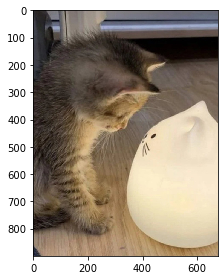

In [2]:
img = imread("kitten.jpg")
imshow("kitten.jpg")

### Двумерная свёртка

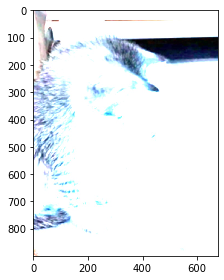

In [3]:
img_src = img
kernel = np.array([[1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1]]) 
kernel = kernel/sum(kernel) 
img_rst = cv2.filter2D(img_src,-1,kernel)
cv2.imwrite('result.jpg',img_rst)
imshow('result.jpg')

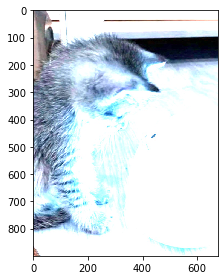

In [4]:
kernel = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 5.0, -1.0], 
                   [0.0, -1.0, 0.0]])
kernel = kernel/sum(kernel) 
img_rst = cv2.filter2D(img_src,-1,kernel)
cv2.imwrite('res.jpg',img_rst)
imshow('res.jpg')

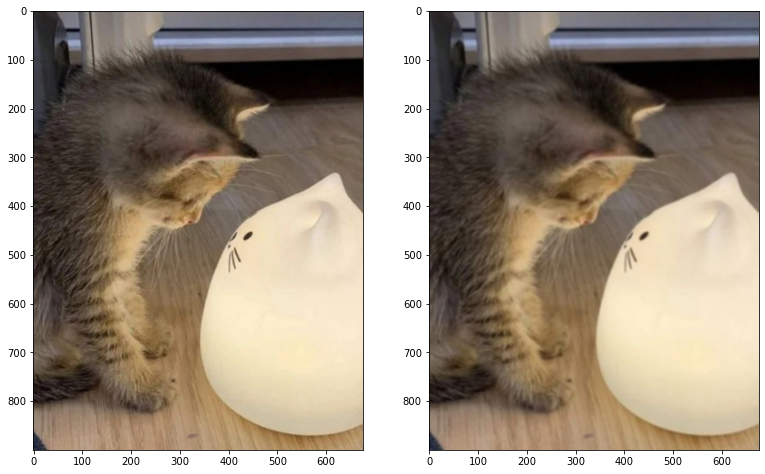

In [5]:
img = cv2.imread("kitten.jpg")
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
box = cv2.boxFilter(rgb_img,-1,(5,5),normalize=True)
 
plt.figure(figsize=(13,13))
plt.subplot (1,2,1)
plt.imshow (rgb_img)
plt.subplot(1,2,2)
plt.imshow(box)
 
plt.show()

### Оценка времени выполнения Box фильтра

In [6]:
%%timeit -r 4 -n 1000
import cv2
import matplotlib.pyplot as plt
import math
import copy
import numpy as np
 
img = cv2.imread("kitten.jpg")
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
box = cv2.boxFilter(rgb_img,-1,(5,5),normalize=True)

12.1 ms ± 227 µs per loop (mean ± std. dev. of 4 runs, 1000 loops each)


### Оценка зависимости времени выполнения от размера Box фильтра

[0.024371499999915613, 0.023586999999906766, 0.023317200000064986, 0.025119599999925413, 0.02416850000008708, 0.02373489999990852, 0.025168099999973492]


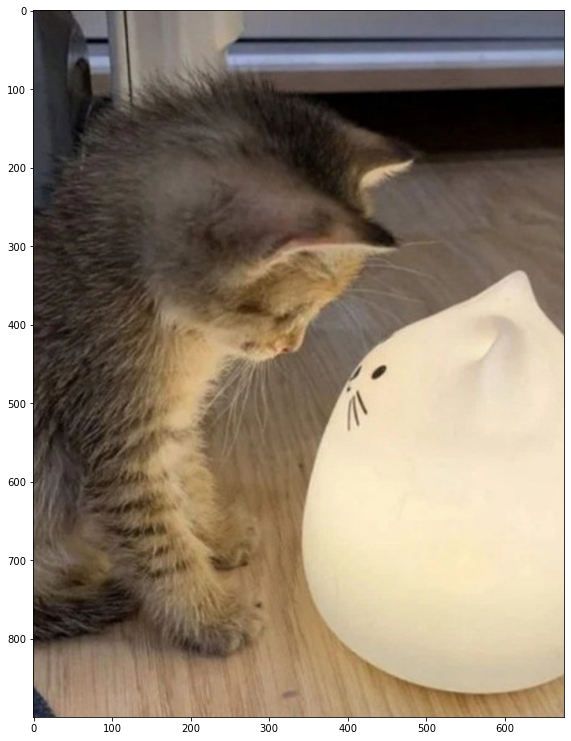

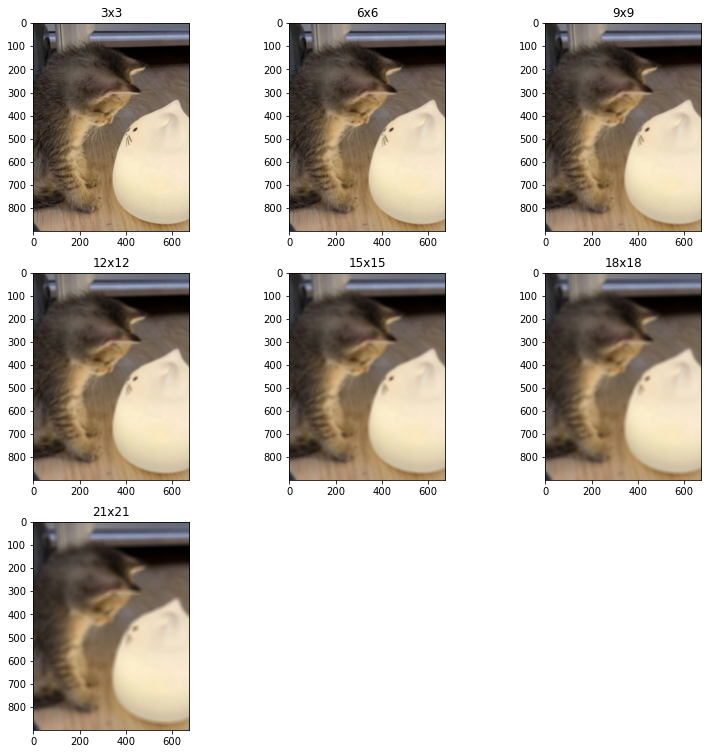

In [7]:
import time

runtime = []
ksize = [3, 6, 9, 12, 15, 18, 21]
img = cv2.imread("kitten.jpg")
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(13,13))
plt.imshow (rgb_img)

fig = plt.figure(figsize=(13, 13))


for idx, size in enumerate(ksize):
    start_time = time.perf_counter()
    box = cv2.boxFilter(rgb_img,-1,(size,size),normalize=True)
    fig.add_subplot(3, 3, idx + 1)
    plt.title(f"{size}x{size}")
    plt.imshow(box)
    runtime.append(time.perf_counter() - start_time)

print(runtime)

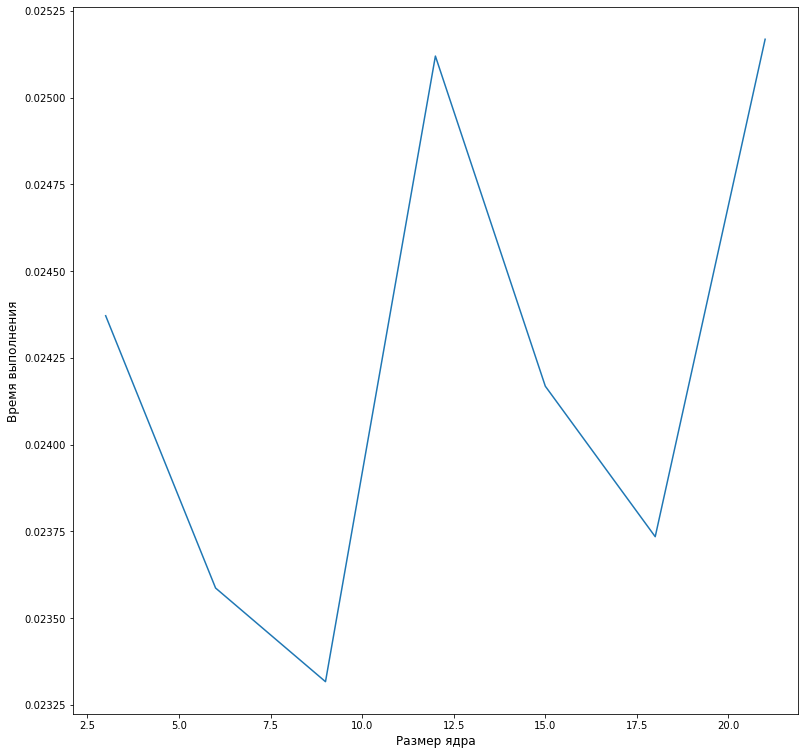

In [8]:
fig2 = plt.figure(figsize=(13,13))
plt.plot(ksize, runtime)
plt.xlabel('Размер ядра', fontsize=12)
plt.ylabel('Время выполнения', fontsize=12)
plt.show()

### Сравнение с фильтрацией Гаусса

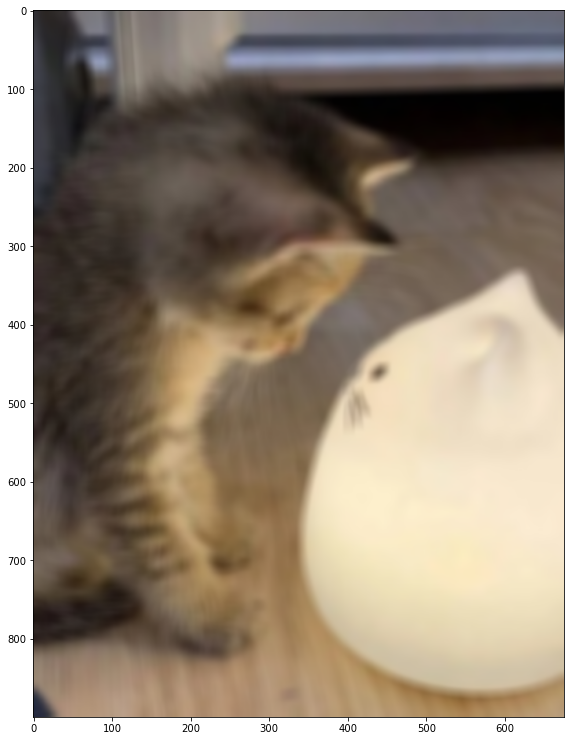

In [9]:
img = cv2.imread("kitten.jpg")
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
box = cv2.boxFilter(rgb_img,-1,(15,15),normalize=True)
 
plt.figure(figsize=(13,13))
plt.imshow(box)
 
plt.show()

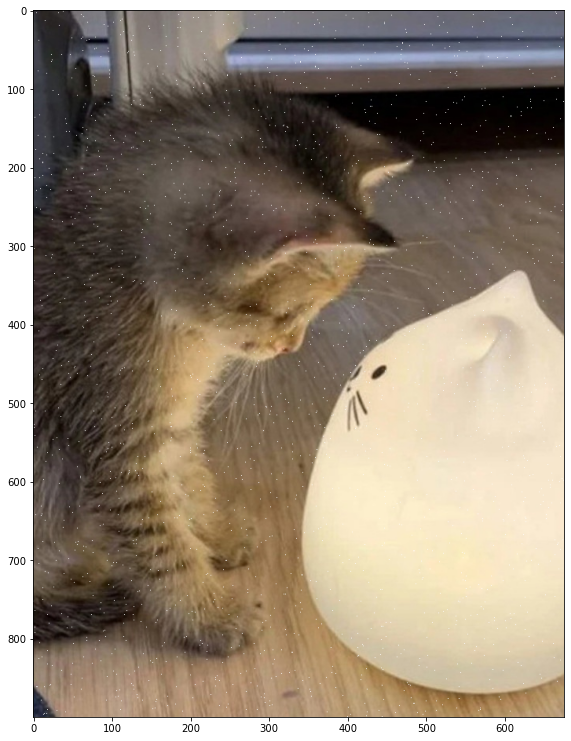

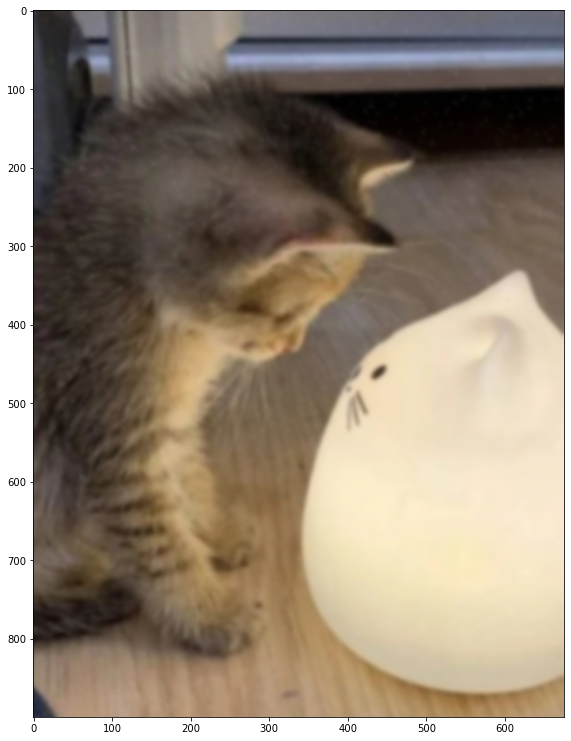

In [10]:
img = cv2.imread("kitten.jpg")
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Добавить точечный шум
for i in range(2000):  
    temp_x = np.random.randint(0, rgb_img.shape[0])
    temp_y = np.random.randint(0, rgb_img.shape[1])
    rgb_img[temp_x][temp_y] = 255

plt.figure(figsize=(13,13))
plt.imshow(rgb_img)

gauss = cv2.GaussianBlur(rgb_img,(15,15),0)
plt.figure(figsize=(13,13))
plt.imshow(gauss)


plt.show()

Вывод: Box фильтрация сильнее размывает фотографию. Гаусс фильтрация позволяет избавиться от шумов на изображении.